### https://www.youtube.com/watch?v=r-uOLxNrNk8

# Übersicht

## Was ist Daten Analyse?
Der Progress Daten zu inspizieren, zu reinigen, zu transformieren und zu bearbeiten mit dem Ziel bestimmte nützliche Informationen zu gewinnen und auf deren Grundlage Entscheidungen zu treffen

## Was gibt es für Tools?
- fertige Software (zB. Qlik, tableau, looker), die zwar einfach zu lernen sind aber keine Anpassungsmöglichkeiten bieten (also limitert sind) und dazu noch beszahlt werden müssen
- Programmiersprachen (zB. Python, R, julia), hingegen sind umsonst, bieten alle Freiheiten bei der Programmierung müssen jedoch erlernt werden.

## Ablauf

### 1. Beschaffung der Daten
- SQL
- CSV
- JSON
- XML
- API
- etc.

### 2. Daten bereinigen
- fehlende Daten oder keine Einträge? 
- Datentypen und Datenwerte? 
- Unrelevante Daten?

### 3. Daten bearbeiten
- Daten ordnen
- Kategorien erstellen und/oder bearbeiten
- Indexing
- Verknüpfungen erstellen

### 4. Daten Analyse
- Visualisierung
- Zusammenhänge aufzeigen
- Hypothesen überprüfen
- Statistiken erstellen
- Reports erstellen

### 5. Action
- Entscheidungen an Hand er Daten fällen
- machine learning Models
- live daschboards
- feature Engineering

#### Wiederholung Notebooks
arbeitet mit mehreren Sprachen

##### Bonus: dynamische Tabellen mit Bokeh (JavaScript)

In [179]:
import requests
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

def get_historic_price(symbol, after='2018-09-01'):
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example

    resp = requests.get(url, params={
    "pair": pair,
    'interval': 60,
    'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()

    data = resp.json()

    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
    (close_time, float(open), float(high), float(low), float(close), float(volume))
    for (close_time, open, high, low, close, vwap, volume, count)
    in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df



In [180]:
# Abrufen der Bitcoin-Daten
btc = get_historic_price('btc')

# Bokeh-Plot vorbereiten
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')

p1.legend.location = "top_left"

show(p1)

Loading BokehJS ...

#### Wiederholung NumPy
- Python ist nicht effizient mit der Verarbeitung von Zahlen
- Lösung: NumPy
- dadurch werden Objekte erstellt, die weniger Speicherplatz belegen (NumPy Arrays)

#### Speicherplatz

In [181]:
import sys
sys.getsizeof(1) # gibt die Anzahl der bytes zurück -> Integer = 24 bytes !!!

28

In [182]:
sys.getsizeof(10**100) # Long = 72 bytes

72

In [183]:
import numpy as np
np.dtype(int).itemsize # Im Vergleich 8 bytes in NumPy (24 in Python)

8

#### Performance
hier ändert sich sogar die Messeinheit

In [184]:
l = list(range(100000))
a = np.arange(100000)

In [185]:
%time np.sum(a**2) # -> 998 Microsekunden

CPU times: total: 0 ns
Wall time: 1 ms


np.int64(333328333350000)

In [186]:
%time np.sum([x**2 for x in l]) # -> 13 Milisekunden

CPU times: total: 15.6 ms
Wall time: 15 ms


np.int64(333328333350000)

#### Boolean Arrays als Filter

In [187]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [188]:
a[[True, False, False, True]] # gibt das erste und letzte Element des Arrays aus

array([0, 3])

In [189]:
a[a >= 2] # gibt alle Elemente die größer oder gleich 2 sind aus

array([2, 3])

In [190]:
a[(a == 0) | (a == 1)] # Verknüpfung von Bedingungen

array([0, 1])

#### Wiederholung Pandas
- basicly Excel in python (Zeilenberechnung, Max, Min, etc. funzt)
- kann aber auch Daten direkt einlesen oder exportieren
- Diagramme erzeugen

# Data Cleaning

In [191]:
# Null Werte Abfragen mit "isnull" (Alternativ: "notnull") oder isna (is not a number)
# Kann als Boolean Arrray wieder zum Filtern genutzt werden

pd.notnull(None)

False

In [192]:
pd.isna(None)

True

In [193]:
# Funktioniert auch bei Arrays, Series, Dataframes

df = pd.isnull(pd.DataFrame({
    'Spalte A': [1,np.nan, 7],
    'Spalte B': [np.nan, 2, 3],
    'Spalte C': [np.nan, 2, np.nan]
}))

In [194]:
df

,Spalte A,Spalte B,Spalte C
0,False,True,True
1,True,False,False
2,False,False,True


In [195]:
# Anzeige der Form der Tabelle (Spalten, Zeilen, Dimensionen, etc.)
df.shape

(3, 3)

In [196]:
# Anzeige der Werte im Allgemeinen der Tabelle (Datentyp, Nullwerte, Bezeichnung der Spalten, etc.)
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 260.0 bytes


In [197]:
# Füllen der Nullwerte mit neuen Werten
df.fillna({'Column A': 1, 'Column B': 30, 'Column C': 15})

,Column A,Column B,Column C,Column D
0,1.0,2.0,15.0,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,1.0,30.0,100.0,110


In [198]:
# Füllen der Nullwerte mit der Funktion "ffill" -> nimmt den vorherigen Wert aus Spalte (axis 0 | Vertikal) oder Zeile (axis 1 | Horizontal)
df.ffill(axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [199]:
df.ffill(axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


#### ungültige Daten finden

In [200]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'], # Fragezeichen
    'Age': [29, 30, 24, 290, 25], # Alter bei 290
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [201]:
# 1. einizgartie Einträge
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [202]:
# 2. Anzahl der jeweiligen Einträge
df['Sex'].value_counts()

Sex
F    2
M    1
D    1
?    1
Name: count, dtype: int64

In [203]:
# 3. Daten ersetzen (Beispiel Tippfehler)
# df['Sex'].replace({'D': 'F', 'N': 'M'}) # -> alle "d" durch "f" ersetzen und alle "n" durch "m" (wenn nur eine Sache ersetzt werden soll 'A', 'B' ohne geschweifte Klammern und Doppelpunkt).

# Bei mehreren Spalten mit Index der Spalten arbeiten
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [204]:
# 4. ungültige Daten finden
df[df['Age'] > 100] # Boolean Array als Filter -> nur Einträge über 100

,Sex,Age
3,D,290


In [205]:
# 5. ungültige Daten bearbeiten
# Annahme Tippfehler bei der letzten Null -> alle Werte die über 100 sind durch 10 teilen
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] /  10
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,29
4,?,25


In [206]:
# 6. Dublikate
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [207]:
ambassadors.duplicated() # Gibt Boolean Werte zurück TRUE wenn es ein Dublikat ist
# ambassadors.duplicated(keep='last') # mit keep kann man den ersten oder letzten Eintrag oder gar keinen (FALSE) auf TRUE lassen

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [208]:
# 7 Dublikate löschen
ambassadors.drop_duplicates() # -> TRUE wird gelöscht. "keep" funktioniert genauso

# bei Datenbanken setzt man den Filter mit "subset" und der Bezeichnung der Spalte (Bsp: subset=['Name']) für die Spalte die auf Dublikate überprüft werden soll

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

#### Textbearbeitung

Annahme Daten kommen per String

In [209]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [210]:
# 1. Wir wissen, dass die Daten mit einem _ getrennt sind
df['Data'].str.split('_', expand=True) # wir teilen die Daten beim _ auf, mit expand=true erzeugen wir eine Tabelle

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [211]:
# 2. Spalten benennen
df = df['Data'].str.split('_', expand=True)
df.columns = ['Year', 'Sex', 'Country', 'No Children']
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [212]:
# 3. Leerzeichen löschen
df['Country'].str.replace(' ', '') # Alternativ mit strip

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [213]:
# 4. Fragzeichen im Jahr löschen
# Zuerst filtern wir die Werte, die ein Fragezeichen enthalten
mask = df['Year'].str.contains('\?')

# Dann ersetzen wir die Werte in der 'Year'-Spalte
df.loc[mask, 'Year'] = df.loc[mask, 'Year'].str.replace(r'(\d{4})\?', r'\1', regex=True)

df

<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:3: SyntaxWarning: invalid escape sequence '\?'
C:\Users\Johannes Mayer\AppData\Local\Temp\ipykernel_15668\1130901034.py:3: SyntaxWarning: invalid escape sequence '\?'
  mask = df['Year'].str.contains('\?')


,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


# Reading Data

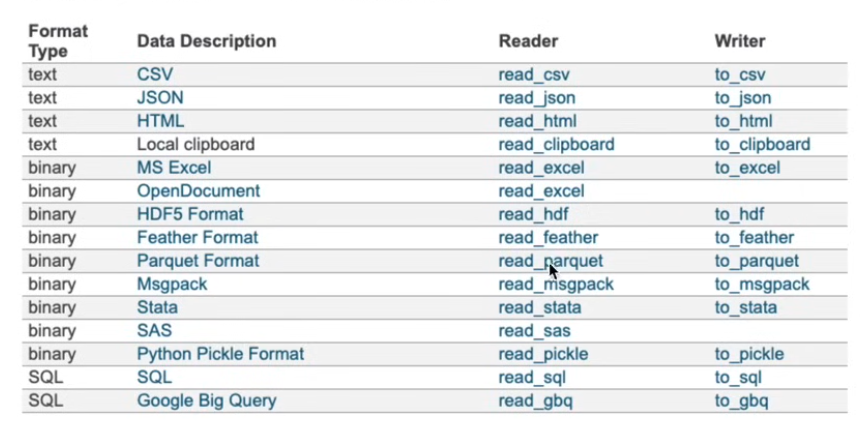

- file öffnen mit open()
- mit "with" kann man es automatisch schließen lassen, sobald der with block durchlaufen worden ist

In [214]:
with open('bible.txt', 'r') as fp:
    for index, line in enumerate(fp.readlines()):
        if (index < 10):                            # Ausgabe der ersten 10 Zeilen
            print(index, line)

0 1:1 In the beginning God created the heaven and the earth.

1 

2 1:2 And the earth was without form, and void; and darkness was upon

3 the face of the deep. And the Spirit of God moved upon the face of the

4 waters.

5 

6 1:3 And God said, Let there be light: and there was light.

7 

8 1:4 And God saw the light, that it was good: and God divided the light

9 from the darkness.



In [215]:
# Daten aus URL
csv_url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"

pd.read_csv(csv_url).head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09


In [216]:
# falsche Daten als NA definieren
# Annahme: leere strings ' ', ? und -
df = pd.read_csv('btc-market-price.csv',        # lesen aus der Datei
                 header=None,                   # Pandas setzt die erste Spalte als Header. Mit "None" verbietet man das
                 na_values=['', '?', '-'],      # Was soll ersetzt werden
                 names=['Timestamp', 'Price'],  # Benennen der Spalten
                 dtype={'Price': 'float'})      # Festlegen des Datentypes float für alle Werte in Spalte Price
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


In [217]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [218]:
# Umwandeln des timestamp Objektes zu Datetimeobject
pd.to_datetime(df['Timestamp']).head()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

C:\Users\Johannes Mayer\AppData\Local\Temp\ipykernel_15668\1347568403.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['Timestamp']).head()
C:\Users\Johannes Mayer\AppData\Local\Temp\ipykernel_15668\1347568403.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


,Timestamp,Price
0,2017-02-04,1099.169125
1,2017-03-04,1141.813000
2,2017-04-04,NaN
3,2017-05-04,1133.079314
4,2017-06-04,NaN


In [219]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

- mit skiprows() kann man angeben, wieviele Zeilen von dem Anfange der Zeile ignoriert werden sollen !!! Header ist immer die erste Zeile [0] !!! um die erste Zeile zu ignorieren: skiprow[1]
- mit skip_blank_lines = True ignoriert Leerzeilen beim lesen der Daten, mit False, werden Leerzeilen zu NaN
- mit usecols = kann man nur bestimmte Zeilen einlesen, entweder mit dem Namen (String) oder Index (Integer)
- wenn die Datenbank nur eine Spalte hat, kann man mit squeeze = True, die Daten als Series statt Dataframe importieren
- schreiben der Datein normal mit .to_csv (siehe oben entsprechend dem gewollten Dateiformat)
- beim lesen aus EXCEL-Dateien ist es besser das excel_file Objekt statt dem normalen read zu verwenden (performance, Verständnis)
- das Objekt beinhaltet bereits eine "parse" funktion